# Circle Coverage Study
In this experiment we show the functionality of the circle_coverage_rate and sectors parameter on a synthetic dataset.
Therefore we execute VoCC with three counts of sectors and three circle coverage rates to investiagte the effect of both hyperparameters. 

In [1]:
# IMPORT
%run ../scripts/experiment_utils.py

import matplotlib.pyplot as plt
import numpy as np
from VoCC import VortexCorrelationClustering

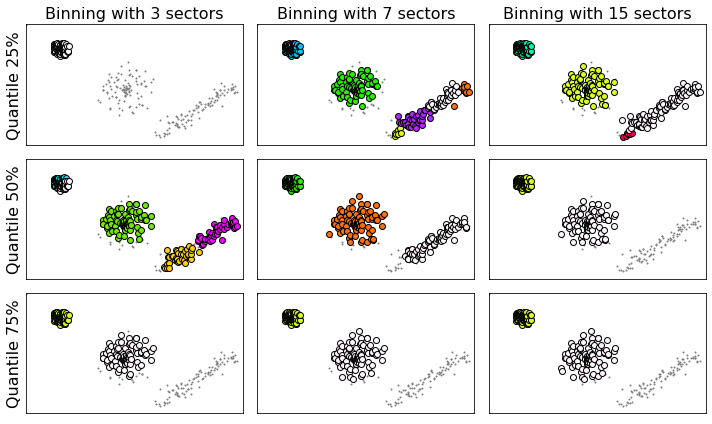

In [2]:
# We create an synthethic dataset focussing on the edgecases to demonstrate the benefits of the circle coverage visually.
coords = create_synthetic_outlier_set(456)
X, Y, U, V = coords.T

fig = plt.figure(figsize = (10,6))
axes = fig.subplot_mosaic(
"""
ABC
EFG
HIJ
""")

alphas = [3,7,15]
quantiles = [.25,.5,.75]

axes_coords = {
    # (alphas[0], quantiles[0]) : 'D',
    (alphas[0], quantiles[0]) : 'A',
    (alphas[0], quantiles[1]) : 'E',
    (alphas[0], quantiles[2]) : 'H',
    (alphas[1], quantiles[0]) : 'B',
    (alphas[1], quantiles[1]) : 'F',
    (alphas[1], quantiles[2]) : 'I',
    (alphas[2], quantiles[0]) : 'C',
    (alphas[2], quantiles[1]) : 'G',
    (alphas[2], quantiles[2]) : 'J',
}

for alpha in alphas:
    for quantile in quantiles:

        ax = axes[axes_coords[(alpha, quantile)]]

        vocc = VortexCorrelationClustering(np.array([40]), 1, alpha, quantile,.99, .01)
        labels = vocc.fit(coords).labels_
        colors = plt.cm.gist_ncar(np.linspace(0, 1, len(np.unique(labels))))
        ax.plot(coords[:, 0], coords[:, 1], '.', color = 'grey', markersize = 2)
        for label, col in zip(np.unique(labels), colors):
            if label < 0:
                continue
            indices = np.argwhere(labels == label).squeeze()
            ax.plot(coords[indices, 0], coords[indices, 1],'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 6, zorder = 2, linewidth = 0)

        ax.set_xlim(0,500)
        ax.set_ylim(0,300)

        ax.set_xticks([])
        ax.set_yticks([])

        if quantile == quantiles[0]:
            ax.set_title(f'Binning with {alpha} sectors', fontsize = 16)

        if alpha == alphas[0]:
            ax.set_ylabel(f'Quantile {quantile * 100:.0f}%', fontsize = 16)
    
        if alpha == 1:
            break

fig.tight_layout()

plt.savefig('../fig/angle_binning_study.png', dpi = 300)